In [ ]:
#   load and explore and audio dataset called MINDS-14, which contains recordings of people asking an e-banking system questions in several languages and dialects.

# from datasets import load_dataset

In [ ]:
# To load the MINDS-14 dataset, we need to copy the dataset’s identifier on the Hub (PolyAI/minds14) and pass it to the load_dataset function. We’ll also specify that we’re only interested in the Australian subset (en-AU) of the data, and limit it to the training split


minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

/home/mat/Documents/voice_ID/venv/lib/python3.11/site-packages/datasets/load.py:1486: FutureWarning: The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [5]:
example =minds[0]
example

{'path': '/home/mat/.cache/huggingface/datasets/downloads/extracted/09bfd9b89dbfb03bbe10fa5f4fece11393464cef8f2f9d053bbdf0f8b4332182/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/home/mat/.cache/huggingface/datasets/downloads/extracted/09bfd9b89dbfb03bbe10fa5f4fece11393464cef8f2f9d053bbdf0f8b4332182/en-AU~PAY_BILL/response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

In [4]:
import torchaudio

audio = torchaudio.load(minds[0]["audio"]["path"])
print(f"Audio shape: {audio[0].shape}, Sample rate: {audio[1]}")

Audio shape: torch.Size([1, 62415]), Sample rate: 8000


In [ ]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

In [18]:
id2label(5)

'business_loan'

In [19]:
# You can easily remove irrelevant features using 🤗 Datasets’ remove_columns method

columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

In [20]:
import gradio as gr


def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

ImportError: cannot import name 'ImageClassificationOutputElement' from 'huggingface_hub' (/home/mat/Documents/voice_ID/venv/lib/python3.11/site-packages/huggingface_hub/__init__.py)

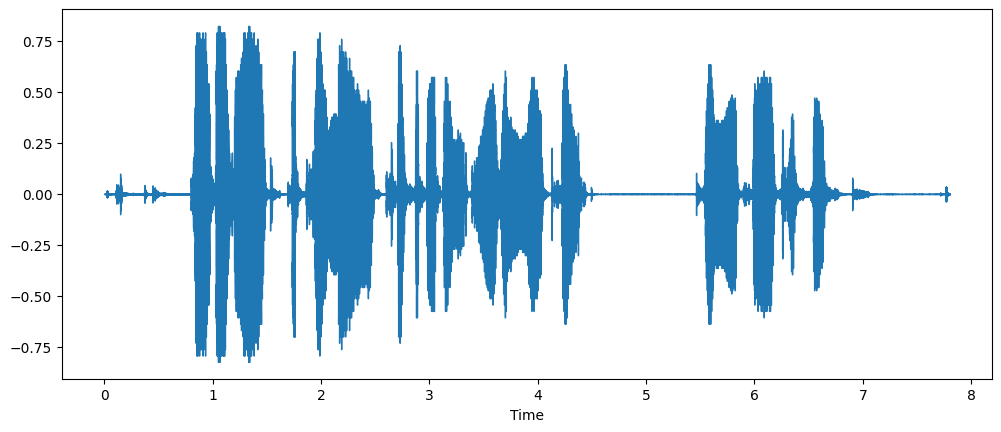

In [21]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)